In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from tifffile import imread

from caImageAnalysis import BrukerFish
from caImageAnalysis.utils import rotate_image
from caImageAnalysis.visualize import visualize_volumes

### Change the exp_folder to the path of the experiment

In [2]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818'

In [3]:
# Initialize BrukerFish
fish = BrukerFish(exp_folder)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


{'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000'),
 'frametimes': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/frametimes.txt'),
 'raw_image': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/._ch2.tif'),
 'rotated': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/raw_rotated.tif'),
 'opts': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/opts.pkl'),
 'mesmerize': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/mesmerize-batch'),
 'log': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000.xml'),
 'voltage_output': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000_Cycl

(array([0., 0., 0., ..., 5., 5., 0.]),
 array([     0,      1,      2, ..., 600018, 600019, 600020]))

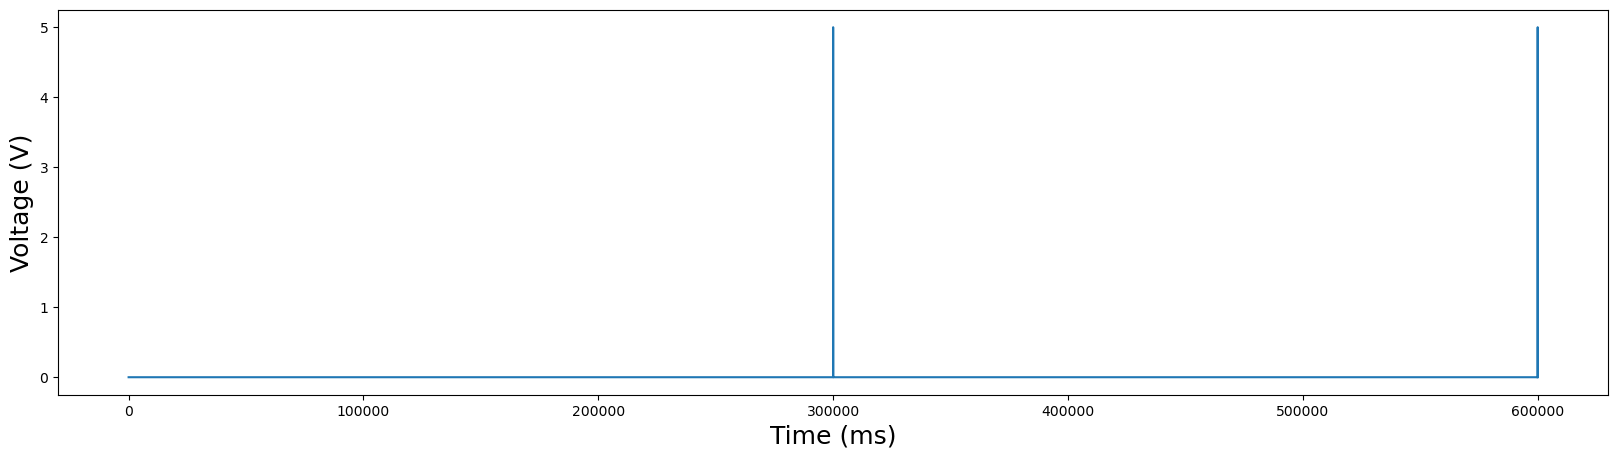

In [4]:
# Plots the Voltage Output waveform of the experiment
fish.voltage_output.get_waveform(plot=True)

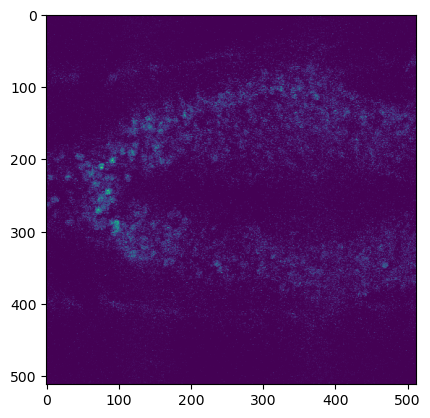

In [24]:
# If running for the first time, create a combined frametimes.txt and combined tif files
fish.create_frametimes_txt()
fish.combine_channel_images('Ch2')

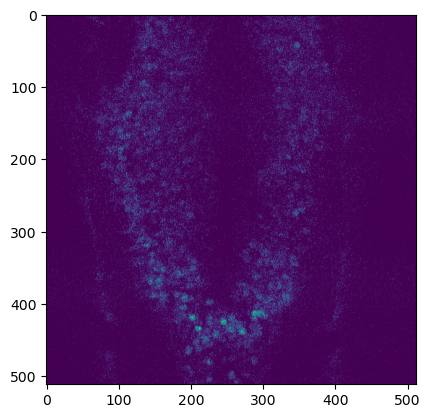

In [27]:
# Check the combined image. If needed, rotate the raw image by angle.
# angle = 180  # for vagal
angle = 90  # for hindbrain

fish.rotate_image(fish.data_paths['raw_image'], angle=angle)

In [ ]:
# When the rotation angle is accurate, also rotate and create the anatomy.tif stack
anatomy_img = imread(fish.data_paths['anatomy'])
anatomy_img_rotated = rotate_image(anatomy_img, path=fish.exp_path.joinpath('anatomy.tif'), angle=angle)
fish.process_filestructure()

plt.imshow(anatomy_img_rotated[0])

In [189]:
# Split the raw volumetric image to individual planes
fish.split_bruker_volumes('Ch2')

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:169: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  plane_frametimes.to_hdf(os.path.join(plane_folder_path, 'frametimes.h5'), 'frametimes')
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the Beautiful

## Visualize planes

In [5]:
iw = visualize_volumes(fish)
iw.show()

RFBOutputContext()

No such comm: 2bcb8d888c1948bfb0a1a677b01e19b5
No such comm: 2bcb8d888c1948bfb0a1a677b01e19b5


In [7]:
iw.plot.canvas.close()